## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  88.304599   141.342809  0.931320  5.558565  1.026377
1  40.549280   216.076320  0.872135  4.201106  1.314058
2  47.573339  1242.528618  0.736322  3.037197  1.421179
3  16.120231   907.831933  0.467762  7.465843  1.668559
4  56.661799  1724.786375  0.054651  5.746654  1.086615


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9943975	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.9832361	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9724129	total: 70.4ms	remaining: 23.4s
3:	learn: 0.9618382	total: 70.9ms	remaining: 17.7s
4:	learn: 0.9524889	total: 71.4ms	remaining: 14.2s
5:	learn: 0.9412932	total: 71.8ms	remaining: 11.9s
6:	learn: 0.9311904	total: 72.2ms	remaining: 10.2s
7:	learn: 0.9216586	total: 72.6ms	remaining: 9s
8:	learn: 0.9114398	total: 73.1ms	remaining: 8.05s
9:	learn: 0.9019210	total: 73.5ms	remaining: 7.27s
10:	learn: 0.8942630	total: 74ms	remaining: 6.65s
11:	learn: 0.8857016	total: 74.4ms	remaining: 6.12s
12:	learn: 0.8784882	total: 74.9ms	remaining: 5.69s
13:	learn: 0.8690688	total: 75.5ms	remaining: 5.32s
14:	learn: 0.8595938	total: 75.9ms	remaining: 4.98s
15:	learn: 0.8510356	total: 76.3ms	remaining: 4.69s
16:	learn: 0.8410925	total: 76.7ms	remaining: 4.44s
17:	learn: 0.8323855	total: 77.1ms	remaining: 4.21s
18:	learn: 0.8240132	total: 77.6ms	remaining: 4.0

89:	learn: 0.4281735	total: 108ms	remaining: 1.09s
90:	learn: 0.4250364	total: 109ms	remaining: 1.09s
91:	learn: 0.4217145	total: 109ms	remaining: 1.08s
92:	learn: 0.4184147	total: 110ms	remaining: 1.07s
93:	learn: 0.4150191	total: 111ms	remaining: 1.06s
94:	learn: 0.4118222	total: 111ms	remaining: 1.05s
95:	learn: 0.4082877	total: 111ms	remaining: 1.05s
96:	learn: 0.4056298	total: 112ms	remaining: 1.04s
97:	learn: 0.4023004	total: 112ms	remaining: 1.03s
98:	learn: 0.3995041	total: 112ms	remaining: 1.02s
99:	learn: 0.3967747	total: 113ms	remaining: 1.01s
100:	learn: 0.3948364	total: 113ms	remaining: 1.01s
101:	learn: 0.3924947	total: 114ms	remaining: 1s
102:	learn: 0.3898995	total: 114ms	remaining: 993ms
103:	learn: 0.3871192	total: 115ms	remaining: 986ms
104:	learn: 0.3844451	total: 115ms	remaining: 979ms
105:	learn: 0.3816471	total: 115ms	remaining: 972ms
106:	learn: 0.3791849	total: 116ms	remaining: 966ms
107:	learn: 0.3769356	total: 116ms	remaining: 959ms
108:	learn: 0.3740671	tota

268:	learn: 0.1720862	total: 187ms	remaining: 508ms
269:	learn: 0.1716949	total: 187ms	remaining: 506ms
270:	learn: 0.1711937	total: 188ms	remaining: 505ms
271:	learn: 0.1705675	total: 188ms	remaining: 504ms
272:	learn: 0.1700812	total: 188ms	remaining: 502ms
273:	learn: 0.1696892	total: 189ms	remaining: 501ms
274:	learn: 0.1693809	total: 189ms	remaining: 499ms
275:	learn: 0.1689753	total: 190ms	remaining: 498ms
276:	learn: 0.1685467	total: 190ms	remaining: 497ms
277:	learn: 0.1680118	total: 191ms	remaining: 496ms
278:	learn: 0.1675347	total: 191ms	remaining: 494ms
279:	learn: 0.1667309	total: 192ms	remaining: 493ms
280:	learn: 0.1663692	total: 192ms	remaining: 492ms
281:	learn: 0.1659661	total: 193ms	remaining: 490ms
282:	learn: 0.1654647	total: 193ms	remaining: 489ms
283:	learn: 0.1651114	total: 193ms	remaining: 487ms
284:	learn: 0.1646441	total: 194ms	remaining: 486ms
285:	learn: 0.1641379	total: 194ms	remaining: 485ms
286:	learn: 0.1636408	total: 195ms	remaining: 484ms
287:	learn: 

505:	learn: 0.0725659	total: 289ms	remaining: 282ms
506:	learn: 0.0723281	total: 290ms	remaining: 282ms
507:	learn: 0.0720515	total: 290ms	remaining: 281ms
508:	learn: 0.0717581	total: 291ms	remaining: 280ms
509:	learn: 0.0714932	total: 291ms	remaining: 280ms
510:	learn: 0.0712343	total: 292ms	remaining: 279ms
511:	learn: 0.0709529	total: 292ms	remaining: 278ms
512:	learn: 0.0706684	total: 293ms	remaining: 278ms
513:	learn: 0.0703935	total: 293ms	remaining: 277ms
514:	learn: 0.0702130	total: 293ms	remaining: 276ms
515:	learn: 0.0700363	total: 294ms	remaining: 276ms
516:	learn: 0.0697411	total: 294ms	remaining: 275ms
517:	learn: 0.0695683	total: 295ms	remaining: 274ms
518:	learn: 0.0694910	total: 295ms	remaining: 274ms
519:	learn: 0.0693639	total: 296ms	remaining: 273ms
520:	learn: 0.0692886	total: 296ms	remaining: 272ms
521:	learn: 0.0692146	total: 297ms	remaining: 272ms
522:	learn: 0.0689323	total: 297ms	remaining: 271ms
523:	learn: 0.0688106	total: 298ms	remaining: 270ms
524:	learn: 

683:	learn: 0.0490968	total: 368ms	remaining: 170ms
684:	learn: 0.0489248	total: 368ms	remaining: 169ms
685:	learn: 0.0487739	total: 369ms	remaining: 169ms
686:	learn: 0.0486921	total: 369ms	remaining: 168ms
687:	learn: 0.0485342	total: 370ms	remaining: 168ms
688:	learn: 0.0484102	total: 370ms	remaining: 167ms
689:	learn: 0.0483303	total: 370ms	remaining: 166ms
690:	learn: 0.0481428	total: 371ms	remaining: 166ms
691:	learn: 0.0480979	total: 371ms	remaining: 165ms
692:	learn: 0.0480683	total: 371ms	remaining: 165ms
693:	learn: 0.0478596	total: 372ms	remaining: 164ms
694:	learn: 0.0478303	total: 372ms	remaining: 163ms
695:	learn: 0.0476813	total: 373ms	remaining: 163ms
696:	learn: 0.0476525	total: 373ms	remaining: 162ms
697:	learn: 0.0475204	total: 373ms	remaining: 162ms
698:	learn: 0.0473752	total: 374ms	remaining: 161ms
699:	learn: 0.0472454	total: 374ms	remaining: 160ms
700:	learn: 0.0472022	total: 375ms	remaining: 160ms
701:	learn: 0.0470745	total: 375ms	remaining: 159ms
702:	learn: 

915:	learn: 0.0285955	total: 471ms	remaining: 43.2ms
916:	learn: 0.0285713	total: 472ms	remaining: 42.7ms
917:	learn: 0.0284418	total: 473ms	remaining: 42.2ms
918:	learn: 0.0284056	total: 473ms	remaining: 41.7ms
919:	learn: 0.0282869	total: 474ms	remaining: 41.2ms
920:	learn: 0.0282400	total: 474ms	remaining: 40.7ms
921:	learn: 0.0281682	total: 474ms	remaining: 40.1ms
922:	learn: 0.0281169	total: 475ms	remaining: 39.6ms
923:	learn: 0.0280931	total: 475ms	remaining: 39.1ms
924:	learn: 0.0280311	total: 476ms	remaining: 38.6ms
925:	learn: 0.0279851	total: 477ms	remaining: 38.1ms
926:	learn: 0.0279399	total: 477ms	remaining: 37.6ms
927:	learn: 0.0279164	total: 478ms	remaining: 37.1ms
928:	learn: 0.0277771	total: 478ms	remaining: 36.6ms
929:	learn: 0.0277069	total: 479ms	remaining: 36ms
930:	learn: 0.0276459	total: 479ms	remaining: 35.5ms
931:	learn: 0.0275737	total: 479ms	remaining: 35ms
932:	learn: 0.0275299	total: 480ms	remaining: 34.5ms
933:	learn: 0.0274982	total: 481ms	remaining: 34ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

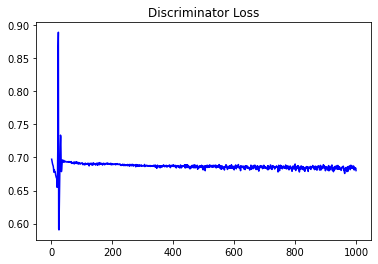

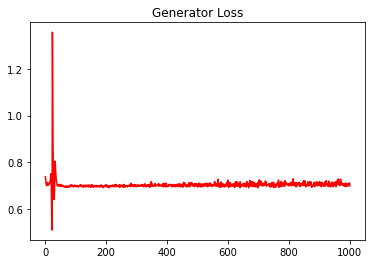

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.28815531991907084


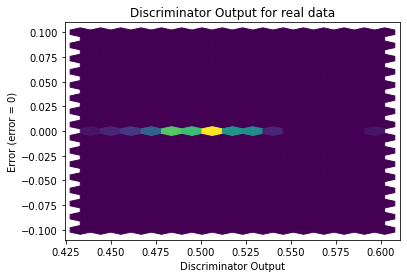

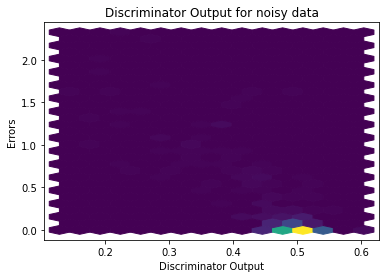

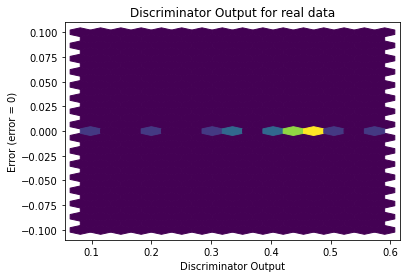

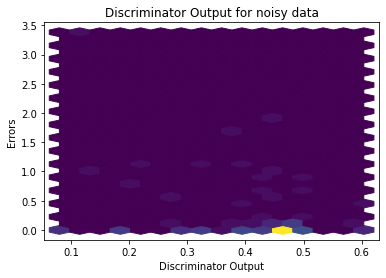

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


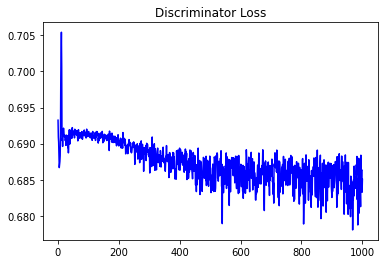

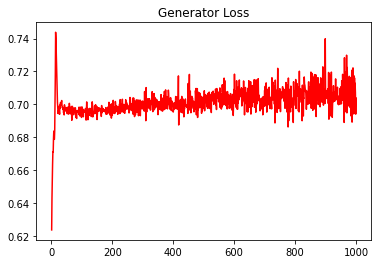

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.322497560372593


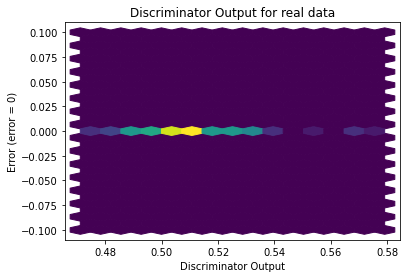

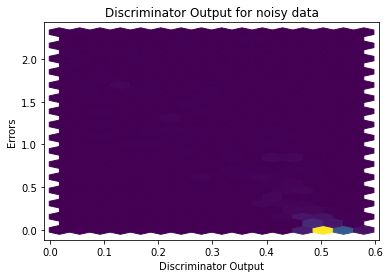

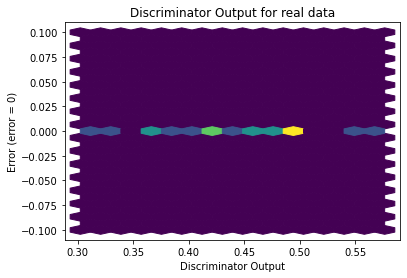

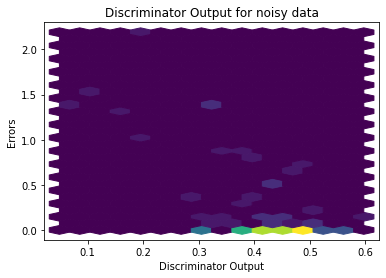

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7934]], requires_grad=True)
